# Timeseries data


A timeseries is (unsurprisingly) a sequence of measurements of the **same variable recorded over time**. Timeseries data are common in many areas of research — for example, daily temperature readings, weekly sales figures, yearly population counts, or neural recordings.

Often, the most effective way to visualise a timeseries is with Seaborn’s `sns.lineplot()`, which can be used to plot:

* A **single timeseries** — e.g. the temperature on Christmas Day across several years.
* **Multiple timeseries** in parallel — e.g. the temperature for each month across different years.
* A **summary timeseries** with error bars — e.g. the mean temperature per month across years, with variability (standard deviation or confidence intervals) shown as shaded bands or error bars.


### Set up Python libraries

As usual, run the code cell below to import the relevant Python libraries

In [1]:
# Set-up Python libraries - you need to run this but you don't need to change it
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import seaborn as sns
sns.set_theme(style='white')
import statsmodels.api as sm
import statsmodels.formula.api as smf


Let's look again at the Oxford weather data:

In [3]:
weather = pd.read_csv("https://raw.githubusercontent.com/jillxoreilly/StatsCourseBook_2024/main/data/OxfordWeather.csv")
display(weather)

YYYY Month  MM  DD  DD365  Tmax  Tmin  Tmean  Trange  Rainfall_mm
0      1827   Jan   1   1      1   8.3   5.6    7.0     2.7          0.0
1      1827   Jan   1   2      2   2.2   0.0    1.1     2.2          0.0
2      1827   Jan   1   3      3  -2.2  -8.3   -5.3     6.1          9.7
3      1827   Jan   1   4      4  -1.7  -7.8   -4.8     6.1          0.0
4      1827   Jan   1   5      5   0.0 -10.6   -5.3    10.6          0.0
...     ...   ...  ..  ..    ...   ...   ...    ...     ...          ...
71338  2022   Apr   4  26    116  15.2   4.1    9.7    11.1          0.0
71339  2022   Apr   4  27    117  10.7   2.6    6.7     8.1          0.0
71340  2022   Apr   4  28    118  12.7   3.9    8.3     8.8          0.0
71341  2022   Apr   4  29    119  11.7   6.7    9.2     5.0          0.0
71342  2022   Apr   4  30    120  17.6   1.0    9.3    16.6          0.0

[71343 rows x 10 columns]

## Timeseries of a single value

**Is the temperature increasing?**

Let's try plotting the temperature on the same day every year to get a sense if temperature is increasing with time.

How about plotting the temperature on Halloween (31st October)? For this, we can use `weather.query` to subset the data to the specific day of interest. We also need to provide the variables of interest for the $x$ and $y$ axis, here `YYYY` and `Tmax` respectively.


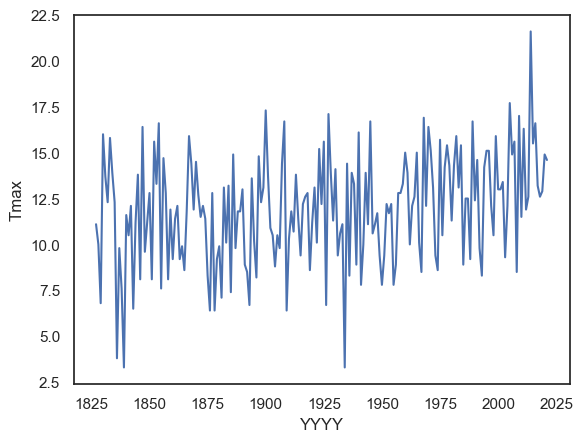

In [8]:
sns.lineplot(data = weather.query('MM==10 and DD==31'), x="YYYY", y='Tmax')
plt.show() 

By combining a line plot with a scatter plot, we can make the individual data points more visible and clearly show the observations that make up the overall trend — although in this case, the combination might feel a bit *busy*.

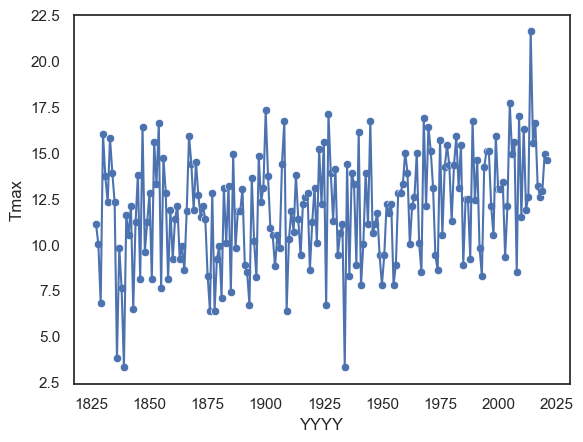

In [13]:
sns.lineplot(data = weather.query('MM==10 and DD==31'), x="YYYY", y='Tmax')
sns.scatterplot(data = weather.query('MM==10 and DD==31'), x="YYYY", y='Tmax')
plt.show() 

***NOTE - By using `weather.query('MM==10 and DD==31')` as the dataset directly in the plotting function above, we effectively created a new dataframe from which to make the plot. We could also have done this more explicitly, as shown below:***


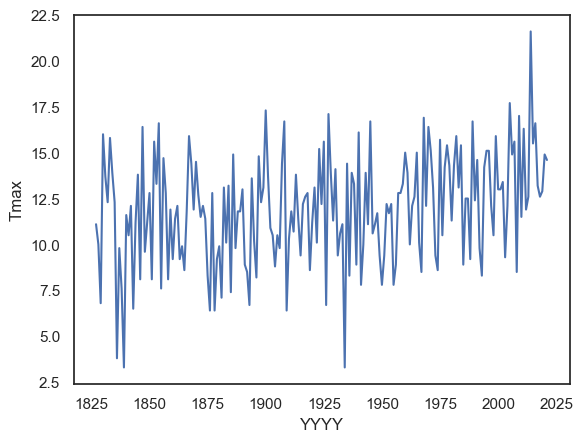

In [14]:
halloween = weather.query('MM==10 and DD==31')
sns.lineplot(data = halloween, x="YYYY", y='Tmax')
plt.show() # this command asks Python to output the plot created above 

There are pros and cons to each approach:

* The inline version (filtering inside the plotting command) is tidier and avoids creating multiple copies of your data.
    * This can help prevent mistakes where you modify one dataframe but forget to update another.
* The explicit version, where you create and name a new dataframe (like halloween), is useful when you plan to reuse that subset several times.
    * It keeps your code readable and saves time if you’ll be making several plots or calculations with the same filtered data.

Both methods are valid — it’s mostly a matter of convenience and clarity for your specific workflow.

## Timeseries of a summary statistic


Sometimes we want our line to represent not individual data points, but a summary statistic, such as the **mean** or **median** value across groups. For example, if we want to plot the **mean temperature for each year**, we need to summarise the data across all 365 daily values in that year (the 365 entries in the <tt>Tmean</tt> column).

When the variable on the $x$-axis (here, <tt>YYYY</tt>) has repeated values in the dataframe — for instance, 365 rows per year — `sns.lineplot()` automatically calculates and plots the mean of the $y$-values for each unique $x$-value.

By default, Seaborn also adds a shaded region around the line to represent uncertainty:

* The shaded area corresponds to the **95% confidence interval**, which is roughly twice the standard error.
* This shading gives an indication of **measurement variability** and sampling uncertainty.
* The **standard error (SE)** is defined as:
    $SE = \frac{SD}{\sqrt{n}}$

We’ll cover confidence intervals and standard error in more detail later in the course.

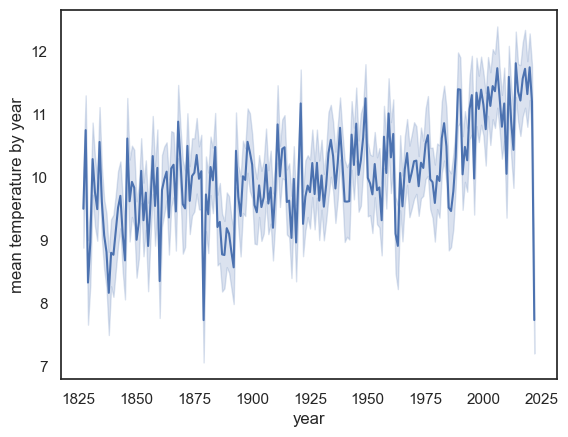

In [33]:
sns.lineplot(data = weather, x="YYYY", y='Tmean')
plt.ylabel('mean temperature by year'), plt.xlabel('year')
plt.show() # this command asks Python to output the plot created above 

**Note:**
1) The mean temperature appears to be rising
2) There is a massive drop in the last year on record, 2022! Why?
    * HINT: check the date of the final recording in 2022


This change over time might be slightly hard to see. To make this clear we can add a **reference line**. Here we will use a reference line that represents the **overall average** temperature across time. Notice, for the past ~30 years or so, the line plot is consistently above the reference line. Check to make sure you understand the syntax of the call to `plot.plt()`

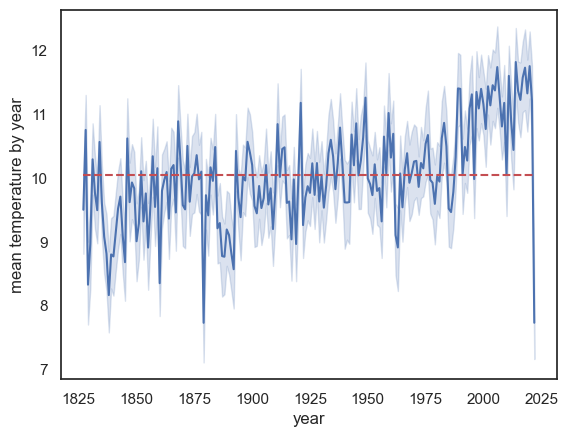

In [34]:
sns.lineplot(data = weather, x="YYYY", y='Tmean')
plt.plot([weather.YYYY.min(),weather.YYYY.max()],[weather.Tmean.mean(), weather.Tmean.mean()],'r--')

plt.ylabel('mean temperature by year'), plt.xlabel('year')
plt.show() # this command asks Python to output the plot created above 


### Modifying Lineplot

We can use additional arguments to get `sns.lineplot()` to plot a different descriptive statistic and a different choice of errorbars/shading.

* we can use any `numpy` function as the *estimator* (the summmary statistic). 
* numpy includes functions for common descriptive statistics, a list can be found <a href="https://numpy.org/doc/stable/reference/routines.statistics.html">here</a>
* numpy functions are preceded by `np.`, eg `np.median()` or `np.corr()`
* note that we normally use the `pandas` functions to get the same descriptive statistics, but here we need to use `numpy` because that is what `sns.lineplot()` expects


For example instead of the mean we can plot the median:

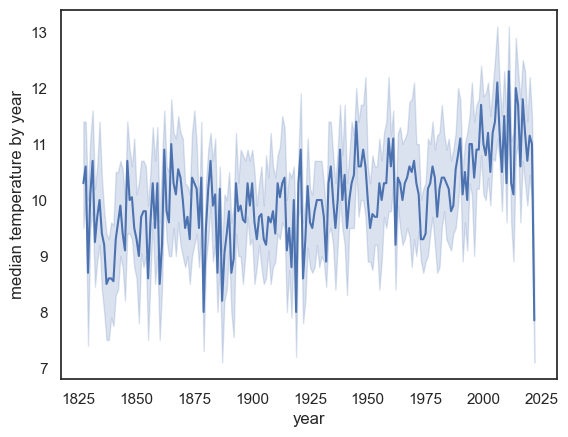

In [38]:
sns.lineplot(data = weather, x="YYYY", y='Tmean', estimator=np.median)
plt.ylabel('median temperature by year')
plt.xlabel('year')
plt.show() # this command asks Python to output the plot created above 

#### Exercises

Try plotting the maximum temperature in each year
* you will need to use a different colummn of the dataframe and also a different *estimator*

In [8]:
# Your code here

## Timeseries for multiple categories

We can create lineplots *disaggregated* by a categorical variable by using the `hue` argument. This allows us to plot multiple timeseries on the same axes — one for each category of a chosen variable.

For example, let’s plot the mean temperature in each month over the years:

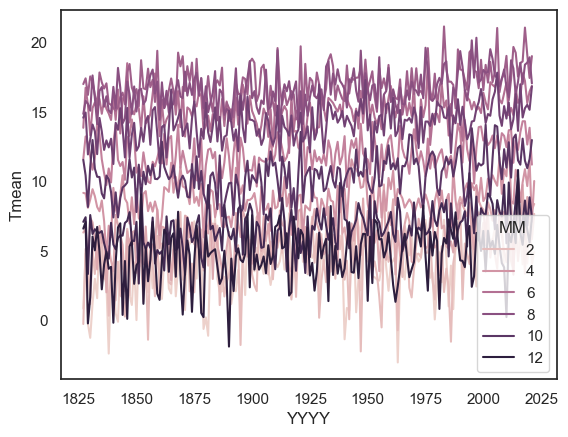

In [48]:
sns.lineplot(data=weather, x='YYYY', y='Tmean', hue='MM', errorbar=None)
plt.show()